# Introduction to Machine Learning - Python HW2

# Name, Student Number: Amirmehdi Jafari Fesharaki, 98109645

## Libraries

In [115]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.stats as stats

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

%matplotlib inline

# Question 1: An Application to Carseats Data
Let's see how the `LDA/QDA` approach performs on the `Carseats` data set, which is
included with `ISLR`. 

Recall: this is a simulated data set containing sales of child car seats at 400 different stores.

In [2]:
# Loading Dataset
df = pd.read_csv('Carseats.csv')
df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12'])
df = df.dropna()
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

See if you can build a model that predicts `ShelveLoc`, the shelf location (Bad, Good, or Medium) of the product at each store. Don't forget to hold out some of the data for testing!

In [3]:
# Dividing Train and Test Datasets
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_len = len(df_shuffled)
train_len = int(df_len * 80/100)
test_len = df_len - train_len
train_set = df.loc[np.arange(0, train_len)]
test_set = df.loc[np.arange(train_len, df_len)].reset_index(drop=True)

X_train = train_set[:][['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Urban', 'US']]
X_train.Urban = X_train.Urban.map({'Yes':1, 'No': 0})
X_train.US = X_train.US.map({'Yes':1, 'No':0})
Y_train = train_set[:]['ShelveLoc']

X_test = test_set[:][['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Urban', 'US']]
X_test.Urban = X_test.Urban.map({'Yes':1, 'No': 0})
X_test.US = X_test.US.map({'Yes':1, 'No':0})
Y_test = test_set[:]['ShelveLoc']

For this model, I used 'Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Urban', 'US' as the features and in order to use 'US' and 'Urban', I mapped 'Yes' and 'No' in each of them to dummy variables 1 and 0.

### LDA Approach

In [4]:
# Training the model with LDA Approach
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, Y_train)

# Printing the model's parameters
print('Priors:',model_lda.priors_)
print('\n\nMeans:\n', model_lda.means_)
print('\n\nCoefficients:\n', model_lda.coef_)

Priors: [0.24375 0.20625 0.55   ]


Means:
 [[  5.55269231 123.53846154  73.85897436   5.80769231 277.55128205
  113.56410256  52.29487179   0.73076923   0.62820513]
 [ 10.20424242 126.24242424  67.83333333   7.31818182 263.6969697
  118.22727273  53.57575758   0.63636364   0.72727273]
 [  7.21386364 124.6875      68.32386364   6.11931818 258.23295455
  115.68181818  54.19886364   0.69886364   0.60227273]]


Coefficients:
 [[-2.14874919e+00  1.98826270e-01  4.06367202e-02  2.59796170e-01
   1.77360405e-03 -2.06273344e-01 -1.01358052e-01  4.37296212e-01
  -4.51534468e-01]
 [ 2.95088533e+00 -2.72594448e-01 -5.12231945e-02 -3.82052424e-01
  -1.44260979e-03  2.81653045e-01  1.32636617e-01 -6.31019724e-01
   1.17379034e+00]
 [-1.54295427e-01  1.41067302e-02  1.19924241e-03  2.81327201e-02
  -2.45050399e-04 -1.42032962e-02 -4.81868556e-03  4.28306661e-02
  -2.40059510e-01]]


In [5]:
# finding the prediction of the model for the test dataset
Y_pred_LDA = model_lda.predict(X_test)
print(np.unique(Y_pred_LDA, return_counts=True))
print('\n\n Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_LDA))
print('\n\n ', classification_report(Y_test, Y_pred_LDA, digits=3))

(array(['Bad', 'Good', 'Medium'], dtype='<U6'), array([20, 21, 39]))


 Confusion Matrix:
 [[15  0  3]
 [ 0 16  3]
 [ 5  5 33]]


                precision    recall  f1-score   support

         Bad      0.750     0.833     0.789        18
        Good      0.762     0.842     0.800        19
      Medium      0.846     0.767     0.805        43

    accuracy                          0.800        80
   macro avg      0.786     0.814     0.798        80
weighted avg      0.805     0.800     0.800        80



<b>As we can see, the LDA model has a weighted average precision of 80% which is quite good. This means that most of the predictions would probably be right for a given dataset.<b>

### QDA Approach

In [6]:
# Training the model with LDA Approach
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, Y_train)

# Printing the model's parameters
print('Priors:',model_qda.priors_)
print('\n\nMeans:\n', model_qda.means_)

Priors: [0.24375 0.20625 0.55   ]


Means:
 [[  5.55269231 123.53846154  73.85897436   5.80769231 277.55128205
  113.56410256  52.29487179   0.73076923   0.62820513]
 [ 10.20424242 126.24242424  67.83333333   7.31818182 263.6969697
  118.22727273  53.57575758   0.63636364   0.72727273]
 [  7.21386364 124.6875      68.32386364   6.11931818 258.23295455
  115.68181818  54.19886364   0.69886364   0.60227273]]


In [7]:
# finding the prediction of the model for the test dataset
Y_pred_QDA = model_qda.predict(X_test)
print(np.unique(Y_pred_QDA, return_counts=True))
print('\n\n Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_QDA))
print('\n\n ', classification_report(Y_test, Y_pred_QDA, digits=3))

(array(['Bad', 'Good', 'Medium'], dtype=object), array([17, 22, 41]))


 Confusion Matrix:
 [[12  0  6]
 [ 0 17  2]
 [ 5  5 33]]


                precision    recall  f1-score   support

         Bad      0.706     0.667     0.686        18
        Good      0.773     0.895     0.829        19
      Medium      0.805     0.767     0.786        43

    accuracy                          0.775        80
   macro avg      0.761     0.776     0.767        80
weighted avg      0.775     0.775     0.774        80



<b>In here, we can see that the QDA predictions are accurate for about 76% of the time which is lower than it's value in LDA. This shows that now always QDA acts better and in some cases LDA could give results better than QDA.<b>

# Question 2

In [8]:
df = pd.read_csv('BloodTestData.csv')
df = df.dropna()
df.head()

CPC         AFP     PROTEIN  Labels
0  238.968911 -303.593836   65.124682       0
1  376.543284 -272.844318  487.316932       0
2  498.765751 -270.173478  328.569027       0
3  381.341606 -255.474488  269.025469       0
4  135.882080 -250.061363  343.970405       0

## Part a

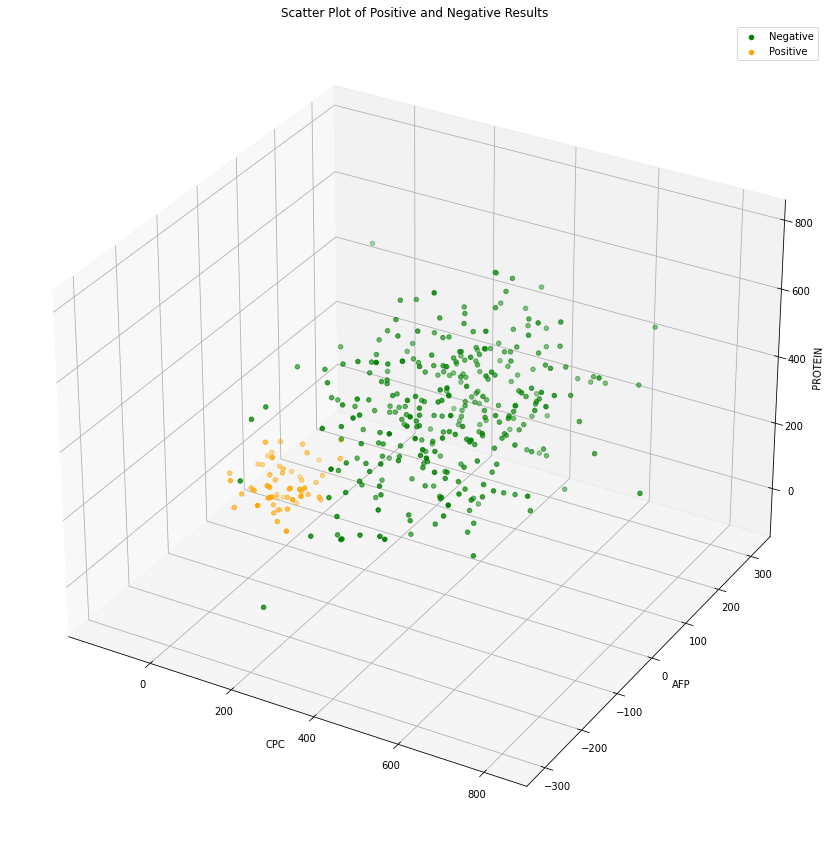

In [9]:
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection ="3d")
df_label1 = df[df['Labels'] == 1]
df_label0 = df[df['Labels'] == 0]

x_label1 = df_label1[:]['CPC'].to_numpy()
x_label0 = df_label0[:]['CPC'].to_numpy()

y_label1 = df_label1[:]['AFP'].to_numpy()
y_label0 = df_label0[:]['AFP'].to_numpy()

z_label1 = df_label1[:]['PROTEIN'].to_numpy()
z_label0 = df_label0[:]['PROTEIN'].to_numpy()

# Creating plot
ax.scatter3D(x_label0, y_label0, z_label0, color = "green")
ax.scatter3D(x_label1, y_label1, z_label1, color = "orange")
plt.legend(['Negative', 'Positive'])
plt.grid()
ax.set_xlabel('CPC')
ax.set_ylabel('AFP')
ax.set_zlabel('PROTEIN')
plt.title("Scatter Plot of Positive and Negative Results")
 
# show plot
plt.show()

## Part b

### Online Learning

In [10]:
def online_learning(L, eta):
    dim = len(L[0]) - 1
    w_array = np.array([np.zeros(dim)])
    theta_array = np.array([0])
    w = np.zeros(dim)
    e = 1;
    theta = 0;
    while (e!=0):
        e = 0
        for data in L:
            x = data[0:dim]
            o = data[dim]
            if (np.sum(w*x) >= theta): 
                y = 1
            else:
                y = 0
            if (y != o):
                theta = theta - eta * (o - y)
                w = w + eta * (o - y) * x
                e = e + abs(o - y)
            w_array = np.append(w_array, [w], axis=0)
            theta_array = np.append(theta_array, theta)
    return (w, theta, w_array, theta_array)

In [11]:
# Showing the plot of the data with the online learning boundry
L = df.to_numpy()
w, theta, w_array, theta_array = online_learning(L, 0.001)

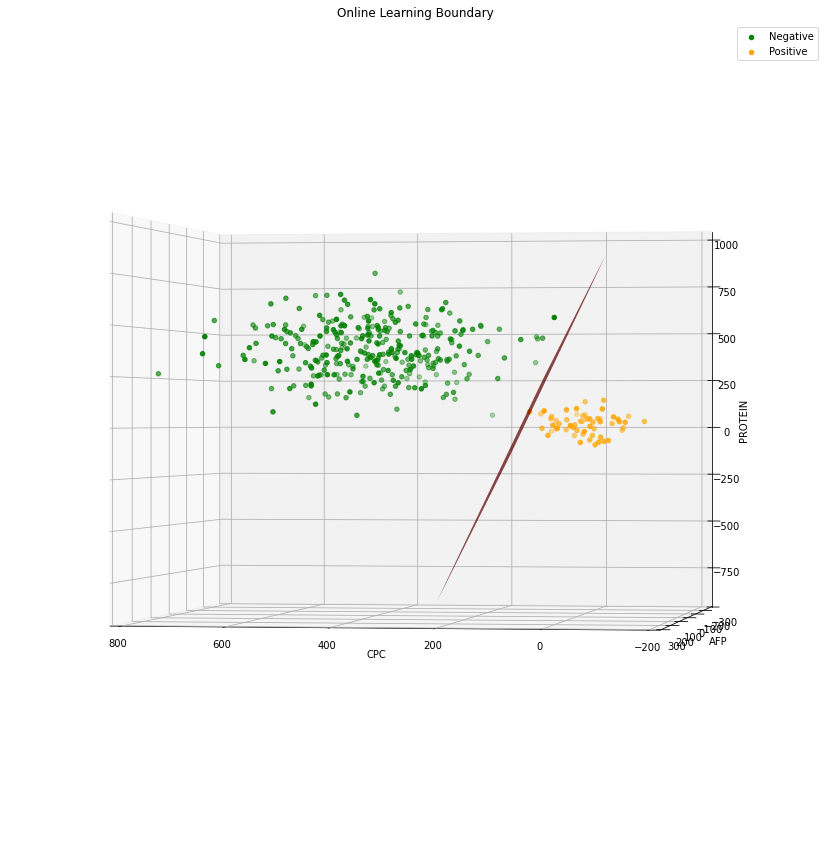

In [12]:
X_boundary, Y_boundary = np.meshgrid(np.linspace(0, 200, 1000), np.linspace(-300, 300, 1000))
Z_boundary = (theta - w[0] * X_boundary - w[1] * Y_boundary) / w[2]

# Plotting 
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection ="3d")

ax.view_init(0, 99)
ax.scatter3D(x_label0, y_label0, z_label0, color = "green")
ax.scatter3D(x_label1, y_label1, z_label1, color = "orange")
ax.plot_surface(X_boundary, Y_boundary, Z_boundary, color = "red")

ax.set_xlabel('CPC')
ax.set_ylabel('AFP')
ax.set_zlabel('PROTEIN')
ax.set_xlim(-200,800)
ax.set_ylim(-300,300)
plt.legend(['Negative', 'Positive'])
plt.grid()
plt.title("Online Learning Boundary")
 
# show plot
plt.show()

<b>As it is shown, the boundary works pretty good and divides the space into 2 subspaces, each containing one class<b>


### Batch Learning

In [13]:
def batch_learning(L, eta):
    dim = len(L[0]) - 1
    w_array = np.array([np.zeros(dim)]) ## contains the value of w for each iteration
    theta_array = np.array([0]) ## contains the value of theta for each iteration
    w = np.zeros(dim)
    e = 1;
    theta = 0;
    while (e!=0):
        e = 0
        theta_c = 0
        w_c = np.zeros(dim)
        for data in L:
            x = data[0:dim]
            o = data[dim]
            if (np.sum(w*x) >= theta): 
                y = 1
            else:
                y = 0
            if (y != o):
                theta_c = theta_c - eta * (o - y)
                w_c = w_c + eta * (o - y) * x
                e = e + abs(o - y)
        theta = theta + theta_c
        w = w + w_c
        w_array = np.append(w_array, [w], axis=0)
        theta_array = np.append(theta_array, theta)
    return (w, theta, w_array, theta_array)

In [14]:
# Showing the plot of the data with the online learning boundry
L = df.to_numpy()
w_batch, theta_batch, w_array_batch, theta_array_batch = batch_learning(L, 0.001)

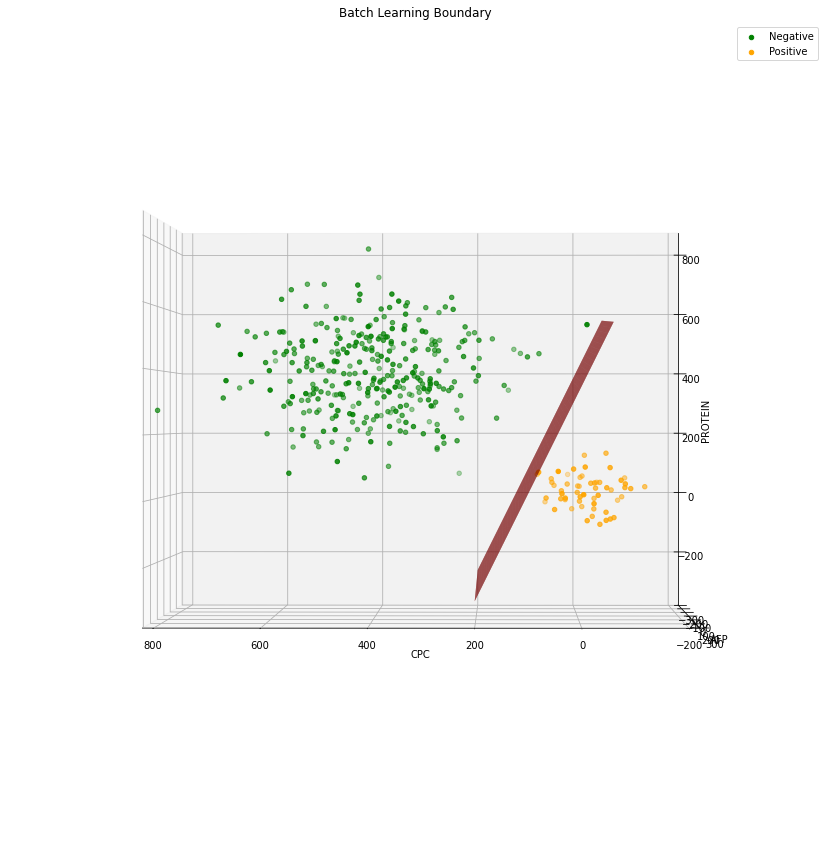

In [15]:

X_batch, Y_batch = np.meshgrid(np.linspace(-60, 200, 1000), np.linspace(-300, 300, 1000))
Z_batch = (theta_batch - w_batch[0] * X_batch - w_batch[1] * Y_batch) / w_batch[2]

# Plotting 
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection ="3d")

ax.view_init(0, 91)
ax.scatter3D(x_label0, y_label0, z_label0, color = "green")
ax.scatter3D(x_label1, y_label1, z_label1, color = "orange")
ax.plot_surface(X_batch, Y_batch, Z_batch, color = "red")

ax.set_xlabel('CPC')
ax.set_ylabel('AFP')
ax.set_zlabel('PROTEIN')
ax.set_xlim(-200,800)
ax.set_ylim(-300,300)
plt.legend(['Negative', 'Positive'])
plt.grid()
plt.title("Batch Learning Boundary")
 
# show plot
plt.show()

<b> As we can see, the boundary which is obtained using batch learning algorithm, perfectly divides space to two subspaces. Interestingly, the boundaries obtained from onine and batch learning algorithms seem to be different and the answer is not necessarily uniqe.

## Part c

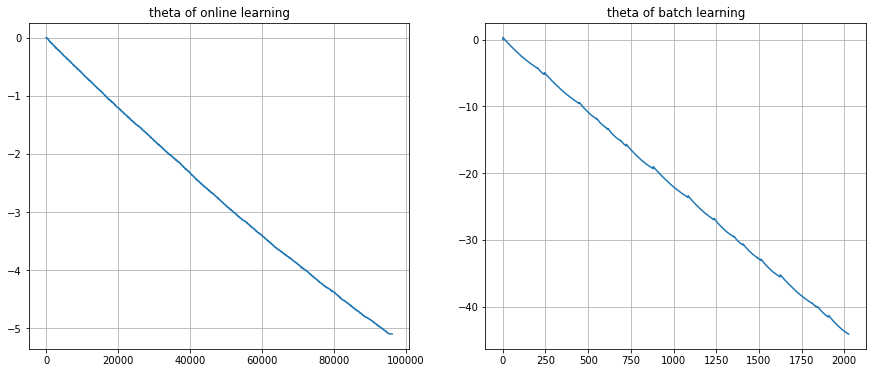

In [16]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
n = np.arange(len(theta_array))
plt.plot(n, theta_array)
plt.grid()
plt.title("theta of online learning")

plt.subplot(1,2,2)
n_batch = np.arange(len(theta_array_batch))
plt.plot(n_batch, theta_array_batch)
plt.grid()
plt.title("theta of batch learning")

plt.show()

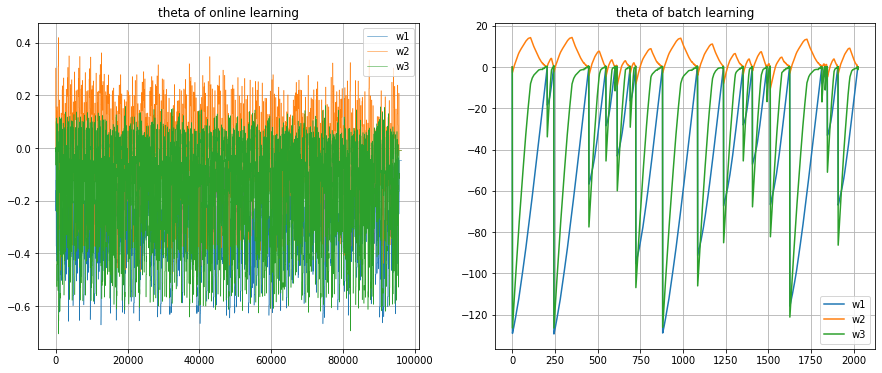

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(n, w_array[:,0], linewidth = 0.5)
plt.plot(n, w_array[:,1], linewidth = 0.5)
plt.plot(n, w_array[:,2], linewidth = 0.5)
plt.grid()
plt.legend(['w1','w2','w3'])
plt.title("theta of online learning")

plt.subplot(1,2,2)
plt.plot(n_batch, w_array_batch[:,0])
plt.plot(n_batch, w_array_batch[:,1])
plt.plot(n_batch, w_array_batch[:,2])
plt.grid()
plt.legend(['w1','w2','w3'])
plt.title("theta of batch learning")

plt.show()

## Part d

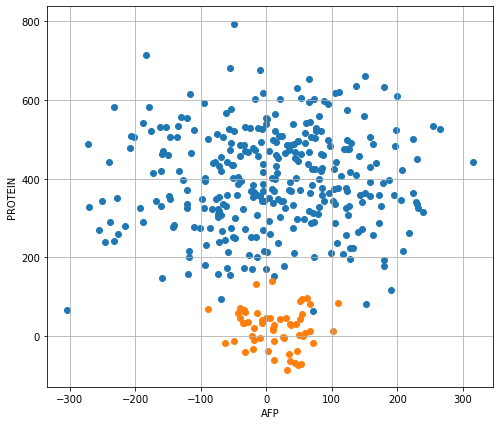

In [18]:
df_label1 = df[df['Labels'] == 1]
df_label0 = df[df['Labels'] == 0]

x_label1 = df_label1[:]['AFP'].to_numpy()
x_label0 = df_label0[:]['AFP'].to_numpy()

y_label1 = df_label1[:]['PROTEIN'].to_numpy()
y_label0 = df_label0[:]['PROTEIN'].to_numpy()

plt.figure(figsize=(8,7))
plt.scatter(x_label0, y_label0)
plt.scatter(x_label1, y_label1)
plt.grid()
plt.xlabel('AFP')
plt.ylabel('PROTEIN')
plt.show()

As we can see, we cannot find any linear boundary to divide the space two subspaces each containing one class. So the answer to this part is <b> no <b>.

## Part e

In [19]:
L = df[:][['AFP', 'PROTEIN', 'Labels']].to_numpy()
w, theta, w_arr, theta_arr = online_learning(L, 0.001)
w_batch, theta_batch, w_array_batch, theta_array_batch(L, 0.001)

KeyboardInterrupt: 

In this part, the block runs for a long time but it does not find any answer. The reason behind it is that there is no linear boundary available for dividing the classes. As a result, the program gets stuck in an unlimited loop and is never able to get out of it because the error would never become zero.

## Part f

By decreasing the dimension, there is a chance for classes to become inseperatable. However, if they still remain seperatable, the amount of processes might decrease which can lead to an increase in the computation speed. On the other hand, by increasing the dimension, if the classes were seperatable in a lower dimension, they would still be seperatable after increasing the dimension as well. In some cases like the one we have solved previously, by increasing the dimension we can make classes that have not been seperatable before, seperatable.

# Question 3

## Part a

In [20]:
# importing dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

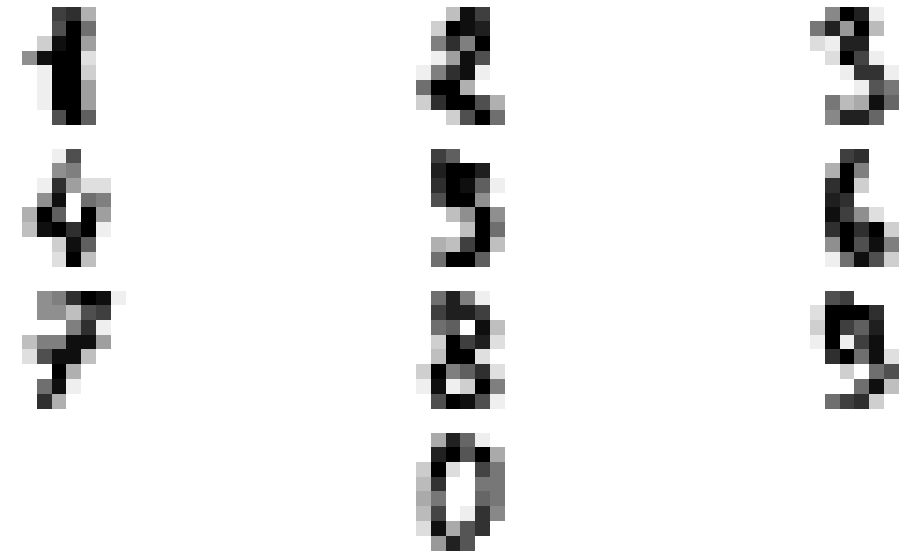

In [21]:
digits = load_digits()
plt.figure(figsize=(20,10))
for i in range(1,10):
    plt.subplot(4,3,i)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
    plt.axis('off')
plt.subplot(4,3,11)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.axis('off')
plt.show()

The digits are printed in the given order:

1,2,3

4,5,6

7,8,9

  0

## Part b and c

In [22]:
# Selecting Test and Train data
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.3, shuffle=True)

# Logistic Regression model
logistic_model = LogisticRegression(max_iter = 10000)
logistic_model.fit(X_train, Y_train)

# the predictions of the model for the given test dataset
Y_pred = logistic_model.predict(X_test) 

# Calculating the error 
def error_calculator(Y_pred, Y_test):
    err_array = (Y_pred == Y_test)
    accuracy = np.sum(err_array) / err_array.shape[0]
    error = 1 - accuracy
    return error

Y_train_pred = logistic_model.predict(X_train)

err_train = error_calculator(Y_train_pred, Y_train)
err_test = error_calculator(Y_pred, Y_test)
print("Train Error:", err_train)
print("Test Error:", err_test)

# Confusion matrix
print('\n\nConfusion Matrix:\n',confusion_matrix(Y_test, Y_pred))
print('\n\n',classification_report(Y_test, Y_pred))

Train Error: 0.0
Test Error: 0.025925925925925908


Confusion Matrix:
 [[58  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  3  0  0  0  1]
 [ 0  1  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  1 50  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  1]
 [ 0  0  0  0  1  0  0  0 52  0]
 [ 0  0  0  0  0  1  0  0  2 54]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      0.98      0.98        65
           2       0.98      1.00      0.99        47
           3       1.00      0.91      0.95        57
           4       0.96      0.98      0.97        49
           5       0.93      0.96      0.94        52
           6       1.00      1.00      1.00        50
           7       1.00      0.98      0.99        52
           8       0.95      0.98      0.96        53
           9       0.95      0.95      0.95        57


As it is calculated, we can see that the classification error is around 4% which means that the classification is working pretty good and it can accurately predict the digit number of a given input. This means that the logistic regression model used for this classification problem suits it perfectly and it is capable of creating dependable predictions. In addition, by looking at the confusion matrix we can see that on average, there are about 2 incorrect predictions in each class out of about 50 samples for each which again proves the perfect accuracy of this model. 

# Question 4

### Part a

In [23]:
df = pd.read_csv('JuiceQuality.csv')
df = df.drop(columns=['Unnamed: 0'])

df_type1 = df.fillna(df.mean())
df_type1 = df_type1.fillna(df_type1.mode().iloc[0]) # we place the mode of each column for categorical variables(there is no mean defined for them)
df_type1 = pd.get_dummies(df_type1)
df_type1 = df_type1.drop(columns=['quality_low'])

df_type2 = df.dropna().reset_index(drop = True)
df_type2 = pd.get_dummies(df_type2)
df_type2 = df_type2.drop(columns=['quality_low'])

<ipython-input-23-ff6705407fa0>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_type1 = df.fillna(df.mean())


In [24]:
df_type1

fixed acidity  volatile acidity  citric acid  chlorides  \
0               5.9          0.320000         0.39   0.114000   
1               7.8          0.240000         0.18   0.046000   
2               7.7          0.580000         0.01   0.088000   
3               8.3          0.180000         0.30   0.033000   
4               6.5          0.339566         0.31   0.044000   
...             ...               ...          ...        ...   
6492            6.0          0.170000         0.33   0.036000   
6493            7.0          0.310000         0.31   0.036000   
6494            7.3          0.260000         0.33   0.056067   
6495            6.4          0.230000         0.35   0.039000   
6496            6.3          0.300000         0.29   0.048000   

      free sulfur dioxide  total sulfur dioxide     A Indx   density  \
0                24.00000            140.000000  13.905151  0.993400   
1                33.00000            160.000000  17.130070  0.996300   
2                12.00000             18.000000  15.618966  0.995680   
3                20.00000             57.000000  18.085322  0.991090   
4                30.55341            127.000000  13.968160  0.992800   
...                   ...                   ...        ...       ...   
6492             30.00000            111.000000  13.602140  0.993620   
6493             45.00000            115.888772  15.227424  0.994707   
6494             48.00000            127.000000  16.240930  0.996930   
6495             43.00000            147.000000  14.171199  0.992160   
6496             33.00000            142.000000  13.925044  0.989560   

            pH  residual sugar_high  ...  sulphates_medium  \
0     3.090000                    0  ...                 0   
1     3.200000                    1  ...                 1   
2     3.217659                    0  ...                 1   
3     3.020000                    0  ...                 1   
4     3.490000                    0  ...                 0   
...        ...                  ...  ...               ...   
6492  3.320000                    0  ...                 1   
6493  2.980000                    0  ...                 0   
6494  3.217659                    0  ...                 1   
6495  3.180000                    0  ...                 0   
6496  3.220000                    0  ...                 0   

      sulphates_very_high  Vit Indx_high  Vit Indx_low  Vit Indx_medium  \
0                       0              0             0                0   
1                       0              0             1                0   
2                       0              0             1                0   
3                       0              0             0                1   
4                       0              0             1                0   
...                   ...            ...           ...              ...   
6492                    0              0             1                0   
6493                    0              0             0                1   
6494                    0              0             1                0   
6495                    0              0             0                1   
6496                    0              1             0                0   

      Vit Indx_very_high  Vit Indx_very_low  quality_high  Type_Lemon_Juice  \
0                      0                  1             1                 1   
1                      0                  0             1                 1   
2                      0                  0             1                 0   
3                      0                  0             1                 1   
4                      0                  0             1                 1   
...                  ...                ...           ...               ...   
6492                   0                  0             1                 1   
6493                   0                  0             1                 1   
649

In [25]:
df_type2

fixed acidity  volatile acidity  citric acid  chlorides  \
0               5.9              0.32         0.39      0.114   
1               7.8              0.24         0.18      0.046   
2               8.3              0.18         0.30      0.033   
3               6.2              0.23         0.38      0.044   
4               6.4              0.23         0.35      0.042   
...             ...               ...          ...        ...   
3189            7.4              0.19         0.30      0.053   
3190            6.8              0.52         0.32      0.044   
3191            6.0              0.17         0.33      0.036   
3192            6.4              0.23         0.35      0.039   
3193            6.3              0.30         0.29      0.048   

      free sulfur dioxide  total sulfur dioxide     A Indx  density    pH  \
0                    24.0                 140.0  13.905151  0.99340  3.09   
1                    33.0                 160.0  17.130070  0.99630  3.20   
2                    20.0                  57.0  18.085322  0.99109  3.02   
3                    12.0                 113.0  14.537886  0.99176  3.30   
4                    54.0                 140.0  14.217306  0.99670  3.23   
...                   ...                   ...        ...      ...   ...   
3189                 48.5                 229.0  15.895337  0.99860  3.14   
3190                 54.0                 221.0  14.597505  0.99720  3.27   
3191                 30.0                 111.0  13.602140  0.99362  3.32   
3192                 43.0                 147.0  14.171199  0.99216  3.18   
3193                 33.0                 142.0  13.925044  0.98956  3.22   

      residual sugar_high  ...  sulphates_medium  sulphates_very_high  \
0                       0  ...                 0                    0   
1                       1  ...                 1                    0   
2                       0  ...                 1                    0   
3                       0  ...                 1                    0   
4                       0  ...                 0                    0   
...                   ...  ...               ...                  ...   
3189                    0  ...                 0                    0   
3190                    0  ...                 0                    0   
3191                    0  ...                 1                    0   
3192                    0  ...                 0                    0   
3193                    0  ...                 0                    0   

      Vit Indx_high  Vit Indx_low  Vit Indx_medium  Vit Indx_very_high  \
0                 0             0                0                   0   
1                 0             1                0                   0   
2                 0             0                1                   0   
3                 0             0                1                   0   
4                 0             0                0                   0   
...             ...           ...              ...                 ...   
3189              0             0                0                   0   
3190              0             1                0                   0   
3191              0             1                0                   0   
3192              0             0                1                   0   
3193              1             0                0                   0   

      Vit Indx_very_low  quality_high  Type_Lemon_Juice  Type_Orange_Juice  
0                     1             1                 1                  0  
1                     0             1                 1                  0  
2                     0             1                 1                  0  
3                     0             0                 1                  0  
4                     1             0                 1                  0  
...                 ...           ...               ...                .

### Part b

In [26]:
# type 1 data
df_type1_normalized = (df_type1 - df_type1.mean())/df_type1.std()
x_type1 = df_type1_normalized.drop(columns=['quality_high']).to_numpy()
## we normalize the features in order to be able to have a better prediction
## normalizing the features would not create any problem for the dummy variables because it is like it just changes
## the encoding from (0,1) to (x1, x2) and will not make any interruption in the other parts of our calculations

y_type1 = df_type1['quality_high'].to_numpy() ## we do not normalize our classes and we use the same 0 and 1 values
train_len_type1 = int(len(x_type1) * 0.8)

## test and train datasets
x_train1 = x_type1[0:train_len_type1]
y_train1 = y_type1[0:train_len_type1]

x_test1 = x_type1[train_len_type1:]
y_test1 = y_type1[train_len_type1:]

# type 2 data
df_type2_normalized = (df_type2 - df_type2.mean())/df_type2.std()
x_type2 = df_type2_normalized.drop(columns=['quality_high']).to_numpy()

y_type2 = df_type2['quality_high'].to_numpy()
train_len_type2 = int(len(x_type2) * 0.8)

## test and train datasets
x_train2 = x_type2[0:train_len_type2]
y_train2 = y_type2[0:train_len_type2]

x_test2 = x_type2[train_len_type2:]
y_test2 = y_type2[train_len_type2:]

In [27]:
print(x_type1.shape)
print(y_type1.shape)

(6497, 25)
(6497,)


In [28]:
def logistic_regression(x_train, y_train, eta = 1e-5, epsilon = 0.01, max_iter = 1000, only_iter = False, print_steps = False):
    dim = x_train.shape[1]
    d_ratio = epsilon * 2 # just for initialization in order to start the loop
    beta = np.zeros(dim)
    step = 0
    while ((step < max_iter) and (d_ratio > epsilon)):
        step = step + 1
        grad_beta = np.zeros(dim)
        for i in range(len(x_train)):
            x = x_train[i]
            y = y_train[i]
            t = np.sum(x * beta)
            grad_beta = grad_beta + x * (y - 1/(1 + np.exp(-t)))
        beta_new = beta + eta * grad_beta
        dbeta = np.sqrt(np.sum((beta_new - beta)**2))
        d_ratio = dbeta / np.sqrt(np.sum(beta_new**2))
        if(only_iter):
            epsilon = d_ratio - 1;
            ## only_iter is for times that we only want to get the answer based on the number of iterations
        beta = beta_new
    if(print_steps):
        print('#Steps:', step)
    return beta

In [29]:
def error_calc(x_test, y_test, beta):
    ''' This function calculates the error and confusion matrix for a given dataset '''
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    length = x_test.shape[0]
    for i in range(len(x_test)):
        x = x_test[i]
        y = y_test[i]
        t = np.sum( x * beta)
        y_pred = 1 / (1 + np.exp(-t))
        if(y_pred >= 0.5):
            y_pred = 1
        else:
            y_pred = 0
        if(y_pred == 1 and y == 1):
            tp = tp + 1
        elif(y_pred == 1 and y == 0):
            fp = fp + 1
        elif(y_pred == 0 and y == 0):
            tn = tn + 1
        else:
            fn = fn + 1
    conf_matrix = np.array([[tp, fn], [fp, tn]])
    acc = (tn + tp)/length
    err = 1 - acc
    return conf_matrix, err, acc

In [30]:
beta = logistic_regression(x_train1, y_train1)

In [31]:
conf_matrix, err, acc = error_calc(x_test1, y_test1, beta)

In [32]:
print(conf_matrix)
print('Error:', err)
print('Accuracy:', acc)

[[472 372]
 [ 92 364]]
Error: 0.3569230769230769
Accuracy: 0.6430769230769231


As we can see in the example of using the logistic_regression function for the dataset with the first type of preprocessing, the error rate is about 37%. In the next part, we plot the data and the predicted boundary for only two features of our dataset and we do this using different rating rates and iterations.

we first define some functions to make the process easier.

In [33]:
def data_plotter(x, y, beta):
    ''' Gets the X and y and that dataset's and plots the data with the logistic regression boundary'''
    x1_one = x[y == 1][:, 0]
    x2_one = x[y == 1][:, 1]
    
    x1_zero = x[y == 0][:, 0]
    x2_zero = x[y == 0][:, 1]
    
    x_boundary = np.arange(min(x[:, 0]), max(x[:, 0]), 0.001)
    y_boundary = - x_boundary * beta[0]/beta[1]
    
    plt.figure()
    plt.scatter(x1_one, x2_one)
    plt.scatter(x1_zero, x2_zero)
    plt.plot(x_boundary, y_boundary, 'r', linewidth = 2)
    plt.grid()
    plt.legend(['Boundary','quality = 1', 'quality = 0'])
    plt.xlim([min(x_boundary), max(x_boundary)])
    plt.show()

In [121]:
def reporter(X, Y):
    '''This function gets a dataset as the input including the X matrix of the dataset and the y vector (which
    is the label of its classes). Then this function devides the dataset to a train and a test dataset and it
    performs the logistic_regression function on this train dataset for different eta and iterations and finally
    prints the results and plots the data with its boundary for each output of all different learning parameters'''
    
    train_len = int(len(X) * 0.8)

    ## test and train datasets
    x_train = X[0:train_len][:, 0:2]
    y_train = Y[0:train_len]

    x_test = X[train_len:][:, 0:2]
    y_test = Y[train_len:]
    
    for eta in [1e-5, 1e-4, 1e-3, 1e-2]:
        for iteration in np.arange(10, 111, 20):
            print('---------- eta =', eta, ', iterations =', iteration,'----------')
            beta = logistic_regression(x_train, y_train, eta = eta, max_iter = iteration, only_iter = True)
            conf_matrix, err, acc = error_calc(x_test, y_test, beta)
            print('Beta:', beta)
            print('Confusion Matrix:\n',conf_matrix)
            print('Error:', err)
            print('Accuracy:', acc)
            
            data_plotter(X, Y, beta)

### First type of preprocessed data

#### Including the outliers

---------- eta = 1e-05 , iterations = 10 ----------
Beta: [-0.01319783 -0.0601136 ]
Confusion Matrix:
 [[593 251]
 [225 231]]
Error: 0.36615384615384616
Accuracy: 0.6338461538461538


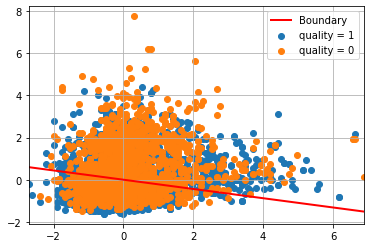

---------- eta = 1e-05 , iterations = 30 ----------
Beta: [-0.03099862 -0.15840052]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


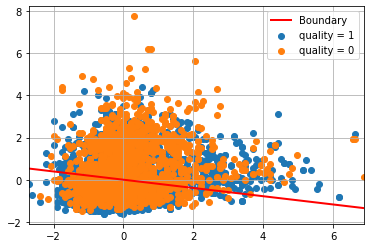

---------- eta = 1e-05 , iterations = 50 ----------
Beta: [-0.04072181 -0.23404404]
Confusion Matrix:
 [[597 247]
 [228 228]]
Error: 0.3653846153846154
Accuracy: 0.6346153846153846


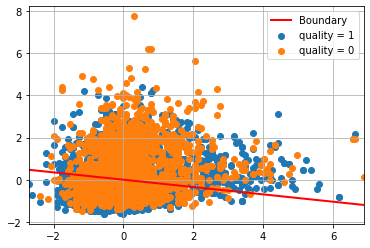

---------- eta = 1e-05 , iterations = 70 ----------
Beta: [-0.04525372 -0.29303904]
Confusion Matrix:
 [[598 246]
 [227 229]]
Error: 0.3638461538461538
Accuracy: 0.6361538461538462


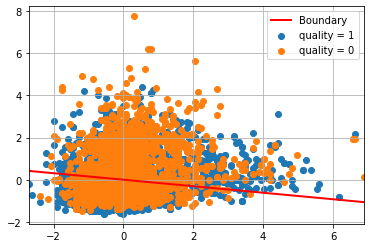

---------- eta = 1e-05 , iterations = 90 ----------
Beta: [-0.04650251 -0.33961419]
Confusion Matrix:
 [[597 247]
 [228 228]]
Error: 0.3653846153846154
Accuracy: 0.6346153846153846


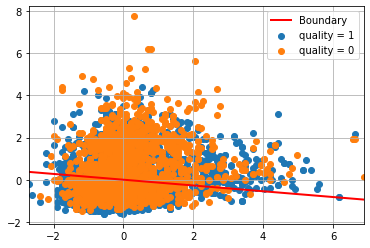

---------- eta = 1e-05 , iterations = 110 ----------
Beta: [-0.04572532 -0.37676768]
Confusion Matrix:
 [[596 248]
 [226 230]]
Error: 0.36461538461538456
Accuracy: 0.6353846153846154


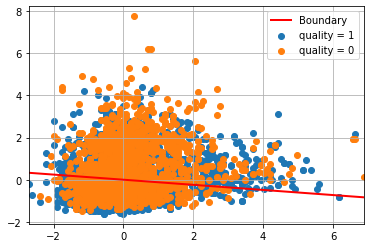

---------- eta = 0.0001 , iterations = 10 ----------
Beta: [-0.04823561 -0.36979437]
Confusion Matrix:
 [[597 247]
 [226 230]]
Error: 0.3638461538461538
Accuracy: 0.6361538461538462


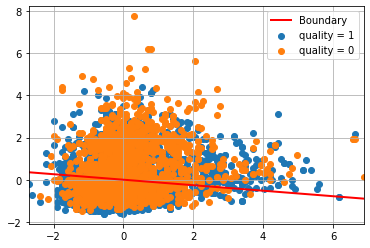

---------- eta = 0.0001 , iterations = 30 ----------
Beta: [-0.02084614 -0.52043438]
Confusion Matrix:
 [[593 251]
 [226 230]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


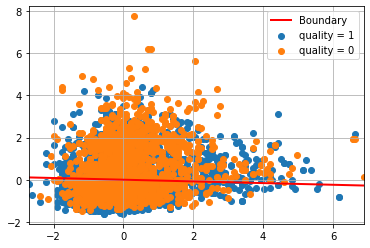

---------- eta = 0.0001 , iterations = 50 ----------
Beta: [-0.01125568 -0.54246713]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


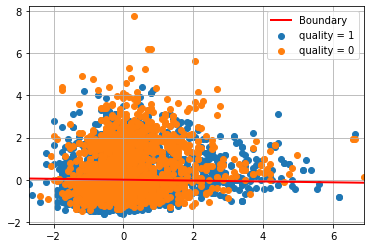

---------- eta = 0.0001 , iterations = 70 ----------
Beta: [-0.00933406 -0.54618356]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


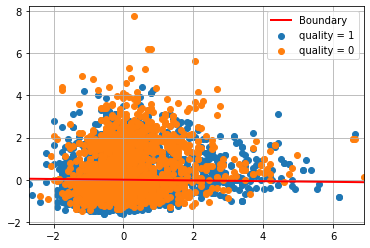

---------- eta = 0.0001 , iterations = 90 ----------
Beta: [-0.00898267 -0.54683182]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


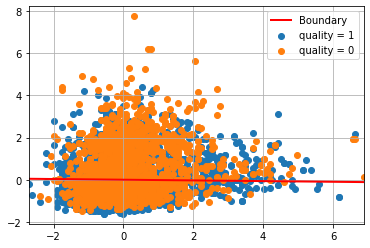

---------- eta = 0.0001 , iterations = 110 ----------
Beta: [-0.00891996 -0.5469459 ]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


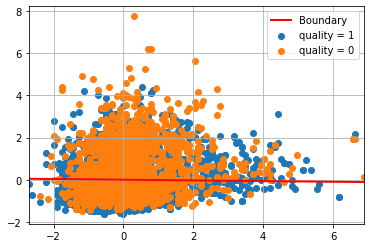

---------- eta = 0.001 , iterations = 10 ----------
Beta: [-0.00889972 -0.54696662]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


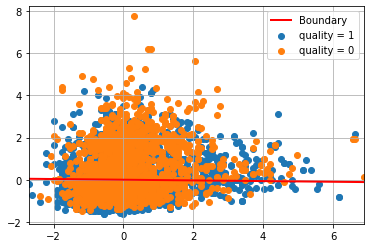

---------- eta = 0.001 , iterations = 30 ----------
Beta: [-0.00890646 -0.54697034]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


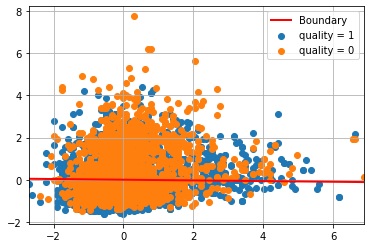

---------- eta = 0.001 , iterations = 50 ----------
Beta: [-0.00890646 -0.54697034]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


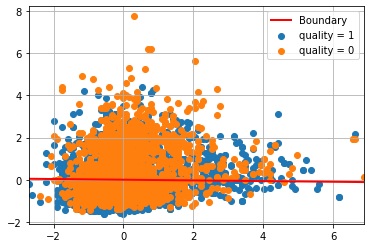

---------- eta = 0.001 , iterations = 70 ----------
Beta: [-0.00890646 -0.54697034]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


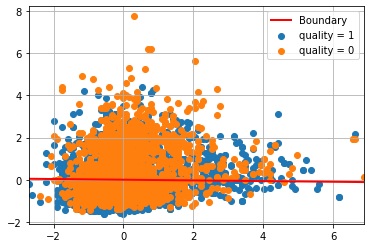

---------- eta = 0.001 , iterations = 90 ----------
Beta: [-0.00890646 -0.54697034]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


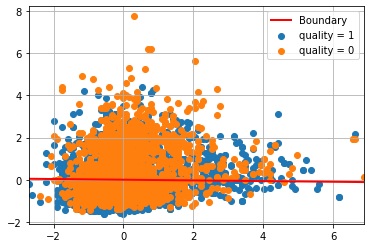

---------- eta = 0.001 , iterations = 110 ----------
Beta: [-0.00890646 -0.54697034]
Confusion Matrix:
 [[594 250]
 [227 229]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


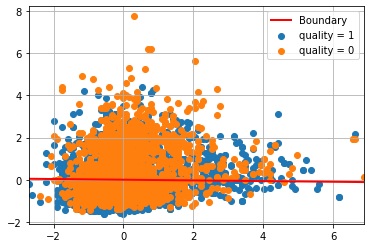

---------- eta = 0.01 , iterations = 10 ----------
Beta: [-4.57676554 -2.16091454]
Confusion Matrix:
 [[571 273]
 [221 235]]
Error: 0.38
Accuracy: 0.62


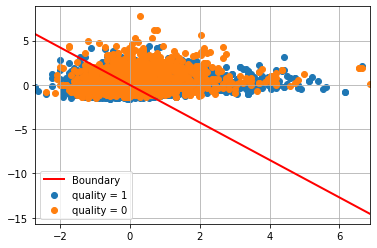

---------- eta = 0.01 , iterations = 30 ----------
Beta: [  0.5851465  -16.85298161]
Confusion Matrix:
 [[579 265]
 [222 234]]
Error: 0.3746153846153846
Accuracy: 0.6253846153846154


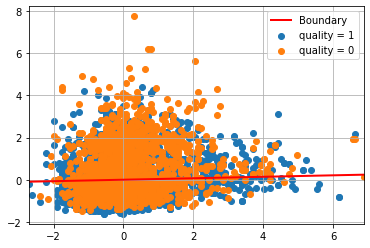

---------- eta = 0.01 , iterations = 50 ----------
Beta: [2.73713716 6.29359354]
Confusion Matrix:
 [[251 593]
 [234 222]]
Error: 0.6361538461538462
Accuracy: 0.3638461538461538


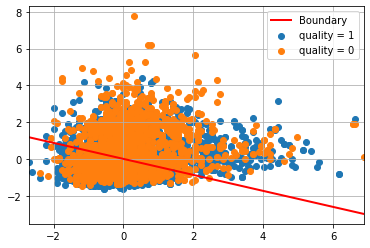

---------- eta = 0.01 , iterations = 70 ----------
Beta: [-0.62437451 -1.81367189]
Confusion Matrix:
 [[592 252]
 [225 231]]
Error: 0.3669230769230769
Accuracy: 0.6330769230769231


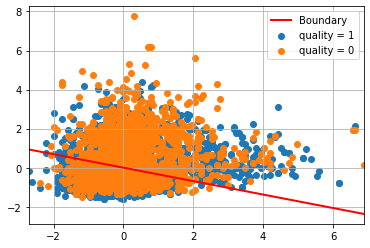

---------- eta = 0.01 , iterations = 90 ----------
Beta: [ 6.66696831 -8.77276958]
Confusion Matrix:
 [[489 355]
 [214 242]]
Error: 0.4376923076923077
Accuracy: 0.5623076923076923


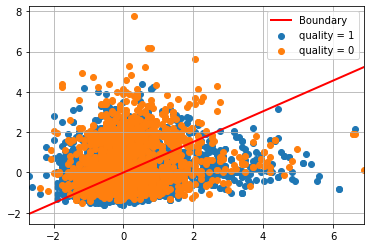

---------- eta = 0.01 , iterations = 110 ----------
Beta: [ 2.61663028 -3.85608864]
Confusion Matrix:
 [[501 343]
 [213 243]]
Error: 0.4276923076923077
Accuracy: 0.5723076923076923


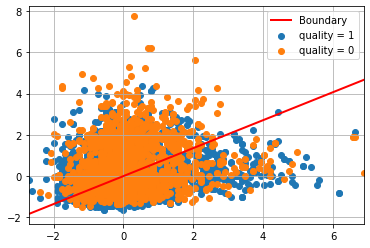

In [36]:
reporter(x_type1, y_type1)

#### Excluding the outliers

---------- eta = 1e-05 , iterations = 10 ----------
Beta: [-0.02113297 -0.05405185]
Confusion Matrix:
 [[590 230]
 [225 209]]
Error: 0.3628389154704944
Accuracy: 0.6371610845295056


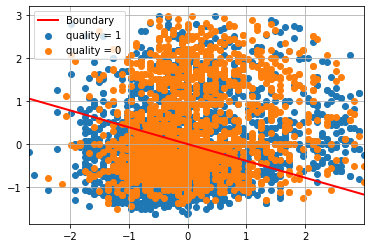

---------- eta = 1e-05 , iterations = 30 ----------
Beta: [-0.05567917 -0.14626309]
Confusion Matrix:
 [[590 230]
 [225 209]]
Error: 0.3628389154704944
Accuracy: 0.6371610845295056


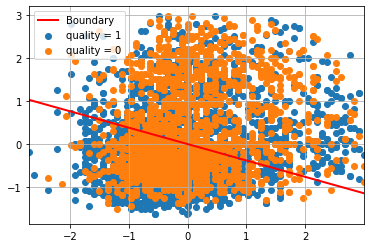

---------- eta = 1e-05 , iterations = 50 ----------
Beta: [-0.08194482 -0.22097504]
Confusion Matrix:
 [[590 230]
 [225 209]]
Error: 0.3628389154704944
Accuracy: 0.6371610845295056


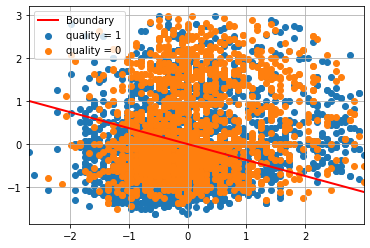

---------- eta = 1e-05 , iterations = 70 ----------
Beta: [-0.10187641 -0.28183198]
Confusion Matrix:
 [[591 229]
 [225 209]]
Error: 0.36204146730462516
Accuracy: 0.6379585326953748


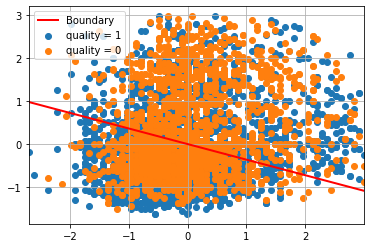

---------- eta = 1e-05 , iterations = 90 ----------
Beta: [-0.11696372 -0.33168235]
Confusion Matrix:
 [[592 228]
 [225 209]]
Error: 0.36124401913875603
Accuracy: 0.638755980861244


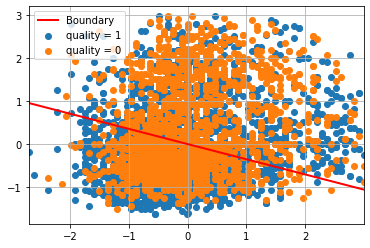

---------- eta = 1e-05 , iterations = 110 ----------
Beta: [-0.12833888 -0.37273547]
Confusion Matrix:
 [[592 228]
 [225 209]]
Error: 0.36124401913875603
Accuracy: 0.638755980861244


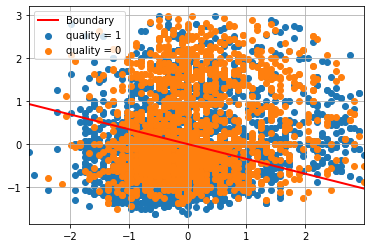

---------- eta = 0.0001 , iterations = 10 ----------
Beta: [-0.12705938 -0.36292857]
Confusion Matrix:
 [[592 228]
 [225 209]]
Error: 0.36124401913875603
Accuracy: 0.638755980861244


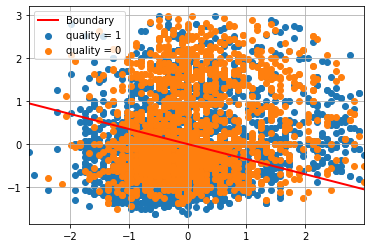

---------- eta = 0.0001 , iterations = 30 ----------
Beta: [-0.15762551 -0.54681881]
Confusion Matrix:
 [[587 233]
 [228 206]]
Error: 0.36762360446570974
Accuracy: 0.6323763955342903


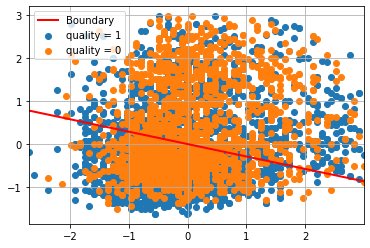

---------- eta = 0.0001 , iterations = 50 ----------
Beta: [-0.15289512 -0.57946128]
Confusion Matrix:
 [[589 231]
 [229 205]]
Error: 0.3668261562998405
Accuracy: 0.6331738437001595


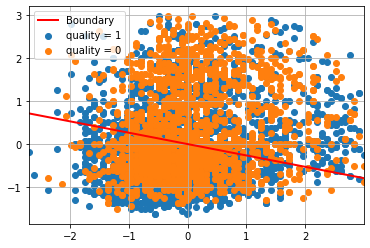

---------- eta = 0.0001 , iterations = 70 ----------
Beta: [-0.14997079 -0.58620574]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


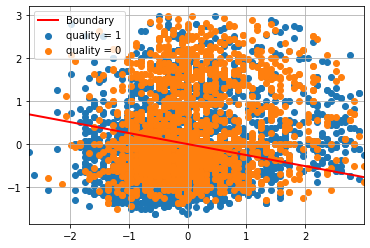

---------- eta = 0.0001 , iterations = 90 ----------
Beta: [-0.14896192 -0.58772967]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


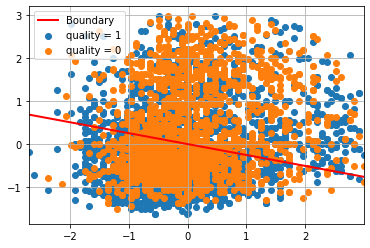

---------- eta = 0.0001 , iterations = 110 ----------
Beta: [-0.14866176 -0.58809556]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


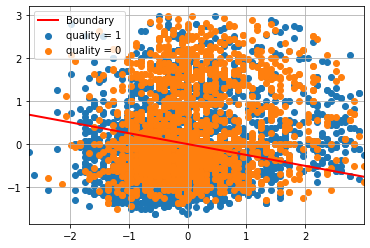

---------- eta = 0.001 , iterations = 10 ----------
Beta: [-0.148551   -0.58821416]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


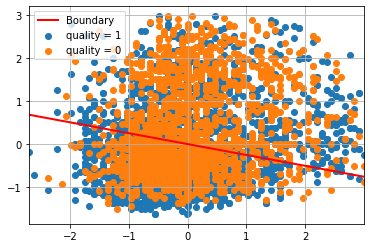

---------- eta = 0.001 , iterations = 30 ----------
Beta: [-0.14854644 -0.58821848]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


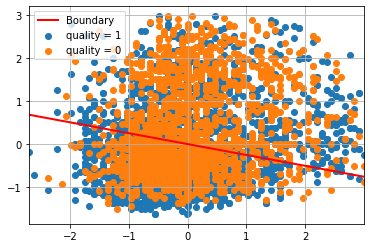

---------- eta = 0.001 , iterations = 50 ----------
Beta: [-0.14854644 -0.58821848]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


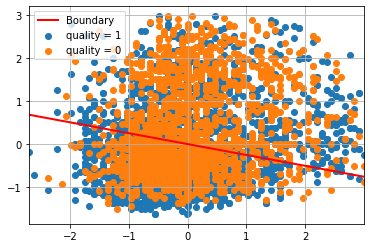

---------- eta = 0.001 , iterations = 70 ----------
Beta: [-0.14854644 -0.58821848]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


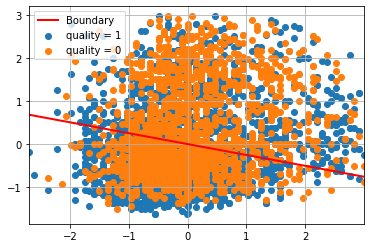

---------- eta = 0.001 , iterations = 90 ----------
Beta: [-0.14854644 -0.58821848]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


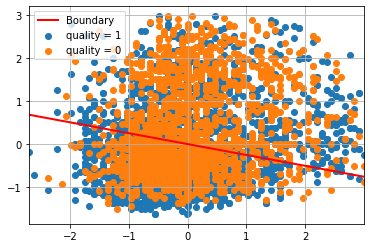

---------- eta = 0.001 , iterations = 110 ----------
Beta: [-0.14854644 -0.58821848]
Confusion Matrix:
 [[588 232]
 [226 208]]
Error: 0.36523125996810213
Accuracy: 0.6347687400318979


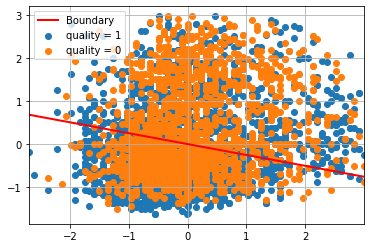

---------- eta = 0.01 , iterations = 10 ----------
Beta: [-1.04696372 -5.60660262]
Confusion Matrix:
 [[593 227]
 [227 207]]
Error: 0.36204146730462516
Accuracy: 0.6379585326953748


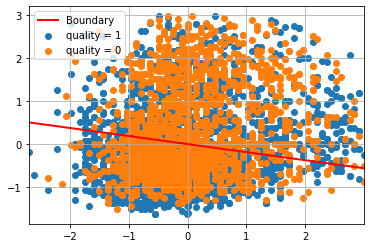

---------- eta = 0.01 , iterations = 30 ----------
Beta: [ -9.38584382 -15.71397921]
Confusion Matrix:
 [[582 238]
 [221 213]]
Error: 0.36602870813397126
Accuracy: 0.6339712918660287


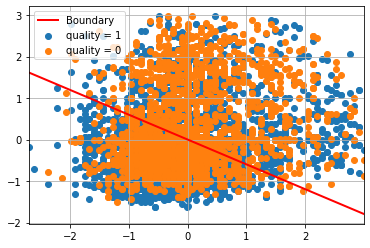

---------- eta = 0.01 , iterations = 50 ----------
Beta: [3.17826766 4.91921461]
Confusion Matrix:
 [[238 582]
 [215 219]]
Error: 0.6355661881977672
Accuracy: 0.36443381180223283


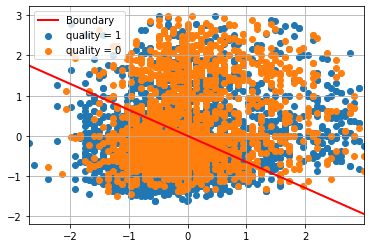

---------- eta = 0.01 , iterations = 70 ----------
Beta: [-1.10161103 -5.63528385]
Confusion Matrix:
 [[592 228]
 [227 207]]
Error: 0.3628389154704944
Accuracy: 0.6371610845295056


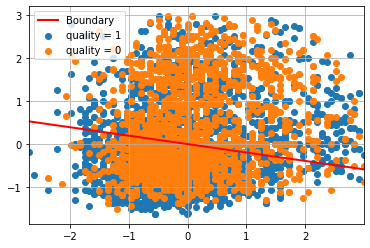

---------- eta = 0.01 , iterations = 90 ----------
Beta: [ -9.38597906 -15.71399447]
Confusion Matrix:
 [[582 238]
 [221 213]]
Error: 0.36602870813397126
Accuracy: 0.6339712918660287


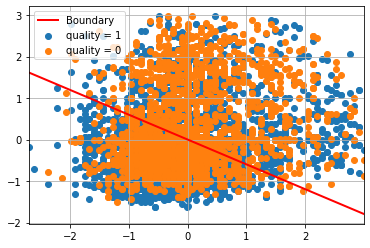

---------- eta = 0.01 , iterations = 110 ----------
Beta: [3.17826781 4.9192143 ]
Confusion Matrix:
 [[238 582]
 [215 219]]
Error: 0.6355661881977672
Accuracy: 0.36443381180223283


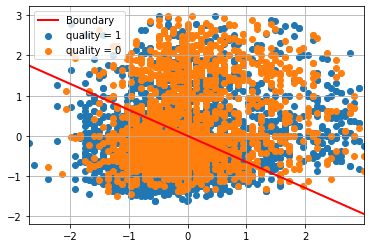

In [119]:
x_type1_outlier_removed = x_type1[((np.abs(stats.zscore(x_type1[:,0:2]))) < 3).all(axis=1)]
y_type1_outlier_removed = y_type1[((np.abs(stats.zscore(x_type1[:,0:2]))) < 3).all(axis=1)]

reporter(x_type1_outlier_removed, y_type1_outlier_removed)

### Second type of preprocessed data

#### Including the outliers

---------- eta = 1e-05 , iterations = 10 ----------
Beta: [-0.00763413 -0.03334641]
Confusion Matrix:
 [[297 113]
 [126 103]]
Error: 0.3740219092331768
Accuracy: 0.6259780907668232


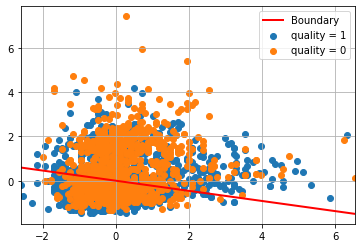

---------- eta = 1e-05 , iterations = 30 ----------
Beta: [-0.0202178  -0.09370879]
Confusion Matrix:
 [[297 113]
 [127 102]]
Error: 0.3755868544600939
Accuracy: 0.6244131455399061


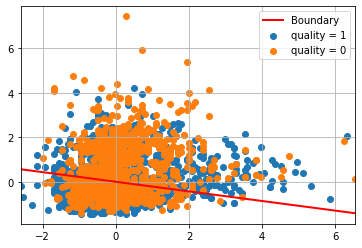

---------- eta = 1e-05 , iterations = 50 ----------
Beta: [-0.02978684 -0.14662737]
Confusion Matrix:
 [[298 112]
 [126 103]]
Error: 0.3724569640062598
Accuracy: 0.6275430359937402


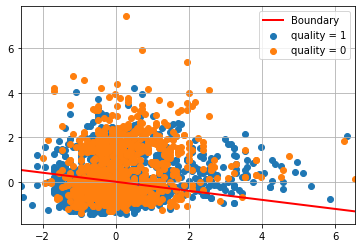

---------- eta = 1e-05 , iterations = 70 ----------
Beta: [-0.03692152 -0.19317337]
Confusion Matrix:
 [[300 110]
 [126 103]]
Error: 0.36932707355242567
Accuracy: 0.6306729264475743


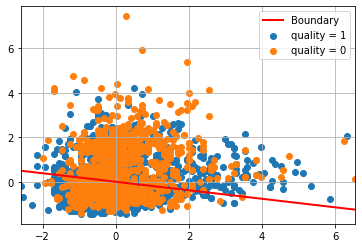

---------- eta = 1e-05 , iterations = 90 ----------
Beta: [-0.04209952 -0.23426396]
Confusion Matrix:
 [[301 109]
 [126 103]]
Error: 0.3677621283255086
Accuracy: 0.6322378716744914


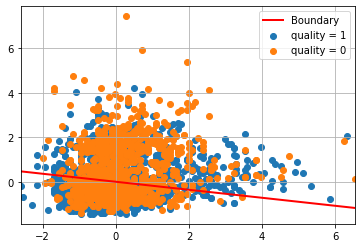

---------- eta = 1e-05 , iterations = 110 ----------
Beta: [-0.04571013 -0.27067153]
Confusion Matrix:
 [[302 108]
 [126 103]]
Error: 0.3661971830985915
Accuracy: 0.6338028169014085


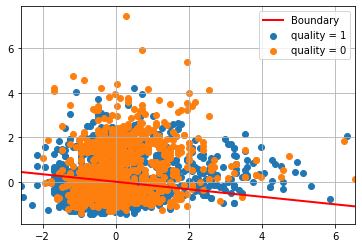

---------- eta = 0.0001 , iterations = 10 ----------
Beta: [-0.04578324 -0.25834069]
Confusion Matrix:
 [[301 109]
 [126 103]]
Error: 0.3677621283255086
Accuracy: 0.6322378716744914


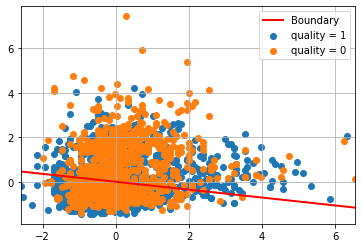

---------- eta = 0.0001 , iterations = 30 ----------
Beta: [-0.04389886 -0.47798926]
Confusion Matrix:
 [[299 111]
 [122 107]]
Error: 0.36463223787167454
Accuracy: 0.6353677621283255


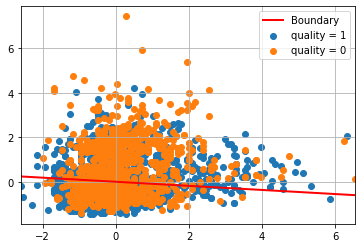

---------- eta = 0.0001 , iterations = 50 ----------
Beta: [-0.02675015 -0.5585915 ]
Confusion Matrix:
 [[297 113]
 [122 107]]
Error: 0.3677621283255086
Accuracy: 0.6322378716744914


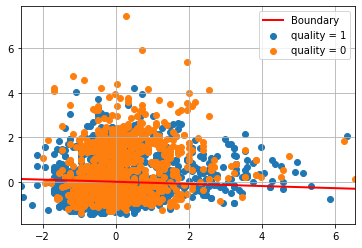

---------- eta = 0.0001 , iterations = 70 ----------
Beta: [-0.0156286  -0.59180899]
Confusion Matrix:
 [[298 112]
 [121 108]]
Error: 0.36463223787167454
Accuracy: 0.6353677621283255


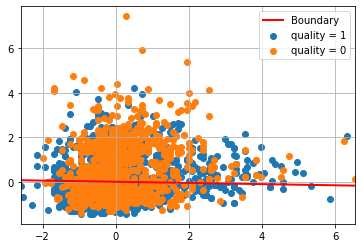

---------- eta = 0.0001 , iterations = 90 ----------
Beta: [-0.00982808 -0.60620423]
Confusion Matrix:
 [[298 112]
 [121 108]]
Error: 0.36463223787167454
Accuracy: 0.6353677621283255


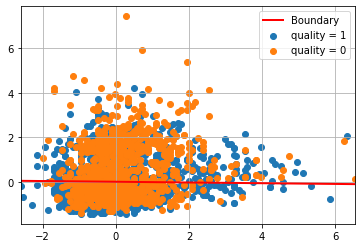

---------- eta = 0.0001 , iterations = 110 ----------
Beta: [-0.00701868 -0.61259164]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


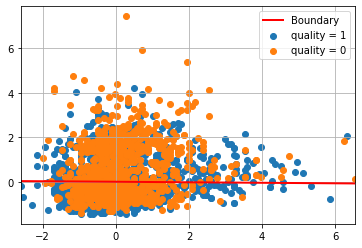

---------- eta = 0.001 , iterations = 10 ----------
Beta: [-0.00584972 -0.61520673]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


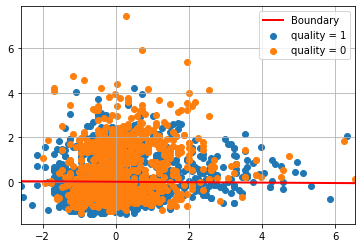

---------- eta = 0.001 , iterations = 30 ----------
Beta: [-0.00458099 -0.61782413]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


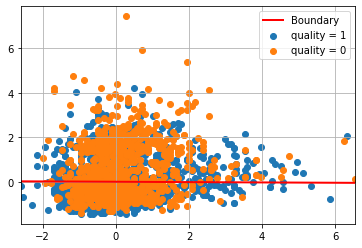

---------- eta = 0.001 , iterations = 50 ----------
Beta: [-0.00458092 -0.61782428]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


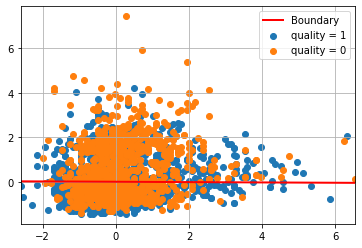

---------- eta = 0.001 , iterations = 70 ----------
Beta: [-0.00458092 -0.61782428]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


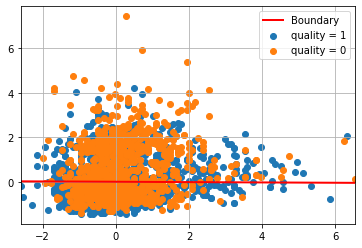

---------- eta = 0.001 , iterations = 90 ----------
Beta: [-0.00458092 -0.61782428]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


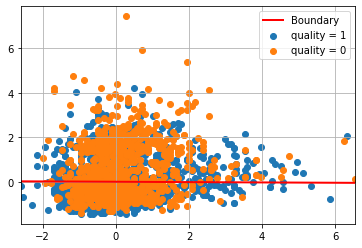

---------- eta = 0.001 , iterations = 110 ----------
Beta: [-0.00458092 -0.61782428]
Confusion Matrix:
 [[300 110]
 [121 108]]
Error: 0.3615023474178404
Accuracy: 0.6384976525821596


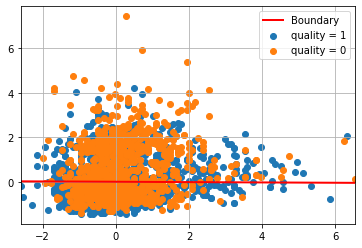

---------- eta = 0.01 , iterations = 10 ----------
Beta: [-2.86380588 -1.57314641]
Confusion Matrix:
 [[275 135]
 [113 116]]
Error: 0.3881064162754304
Accuracy: 0.6118935837245696


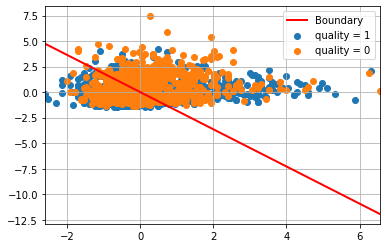

---------- eta = 0.01 , iterations = 30 ----------
Beta: [-5.48900998 -6.71035448]
Confusion Matrix:
 [[288 122]
 [120 109]]
Error: 0.37871674491392804
Accuracy: 0.621283255086072


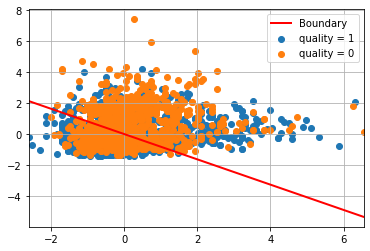

---------- eta = 0.01 , iterations = 50 ----------
Beta: [-5.55705024 -5.99432624]
Confusion Matrix:
 [[287 123]
 [119 110]]
Error: 0.37871674491392804
Accuracy: 0.621283255086072


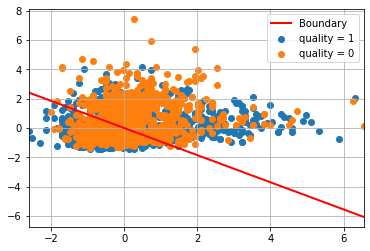

---------- eta = 0.01 , iterations = 70 ----------
Beta: [-1.67186188  0.65656665]
Confusion Matrix:
 [[229 181]
 [142  87]]
Error: 0.5054773082942097
Accuracy: 0.4945226917057903


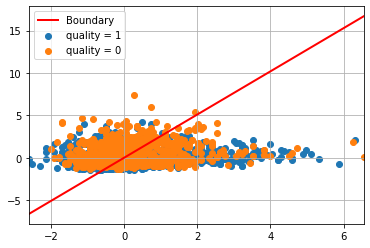

---------- eta = 0.01 , iterations = 90 ----------
Beta: [-1.44710421 -0.84264481]
Confusion Matrix:
 [[274 136]
 [111 118]]
Error: 0.38654147104851333
Accuracy: 0.6134585289514867


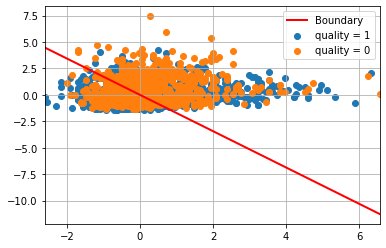

---------- eta = 0.01 , iterations = 110 ----------
Beta: [ 0.63737421 -1.40436115]
Confusion Matrix:
 [[278 132]
 [115 114]]
Error: 0.38654147104851333
Accuracy: 0.6134585289514867


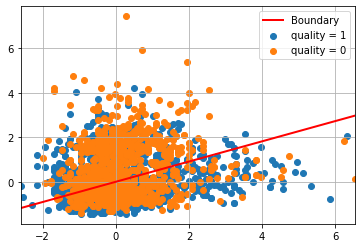

In [37]:
reporter(x_type2, y_type2)

#### Excluding the outliers

---------- eta = 1e-05 , iterations = 10 ----------
Beta: [-0.01234395 -0.02943334]
Confusion Matrix:
 [[295 104]
 [125  92]]
Error: 0.3717532467532467
Accuracy: 0.6282467532467533


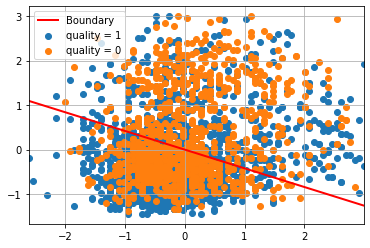

---------- eta = 1e-05 , iterations = 30 ----------
Beta: [-0.03473652 -0.08380572]
Confusion Matrix:
 [[295 104]
 [125  92]]
Error: 0.3717532467532467
Accuracy: 0.6282467532467533


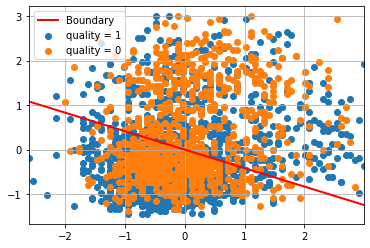

---------- eta = 1e-05 , iterations = 50 ----------
Beta: [-0.05437453 -0.13272385]
Confusion Matrix:
 [[294 105]
 [125  92]]
Error: 0.37337662337662336
Accuracy: 0.6266233766233766


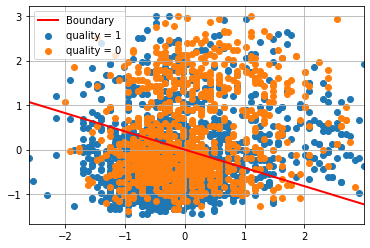

---------- eta = 1e-05 , iterations = 70 ----------
Beta: [-0.07159293 -0.17678391]
Confusion Matrix:
 [[294 105]
 [125  92]]
Error: 0.37337662337662336
Accuracy: 0.6266233766233766


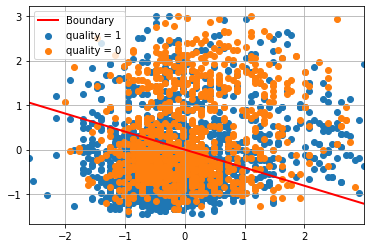

---------- eta = 1e-05 , iterations = 90 ----------
Beta: [-0.08668957 -0.21652215]
Confusion Matrix:
 [[293 106]
 [125  92]]
Error: 0.375
Accuracy: 0.625


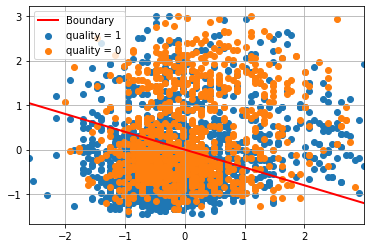

---------- eta = 1e-05 , iterations = 110 ----------
Beta: [-0.09992683 -0.25241579]
Confusion Matrix:
 [[293 106]
 [125  92]]
Error: 0.375
Accuracy: 0.625


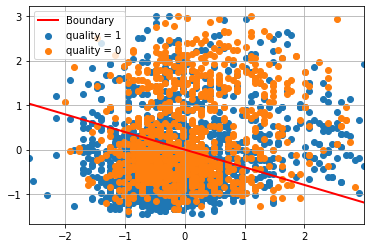

---------- eta = 0.0001 , iterations = 10 ----------
Beta: [-0.09559473 -0.23923081]
Confusion Matrix:
 [[293 106]
 [125  92]]
Error: 0.375
Accuracy: 0.625


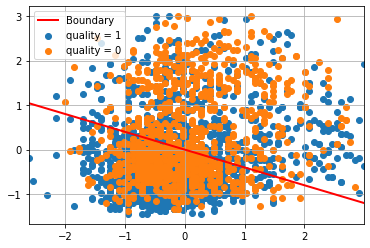

---------- eta = 0.0001 , iterations = 30 ----------
Beta: [-0.16875645 -0.46964158]
Confusion Matrix:
 [[294 105]
 [124  93]]
Error: 0.3717532467532467
Accuracy: 0.6282467532467533


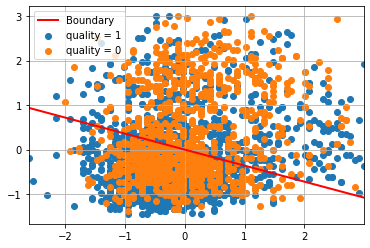

---------- eta = 0.0001 , iterations = 50 ----------
Beta: [-0.18602453 -0.56225156]
Confusion Matrix:
 [[294 105]
 [125  92]]
Error: 0.37337662337662336
Accuracy: 0.6266233766233766


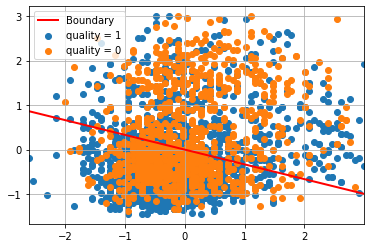

---------- eta = 0.0001 , iterations = 70 ----------
Beta: [-0.18796946 -0.60255429]
Confusion Matrix:
 [[295 104]
 [125  92]]
Error: 0.3717532467532467
Accuracy: 0.6282467532467533


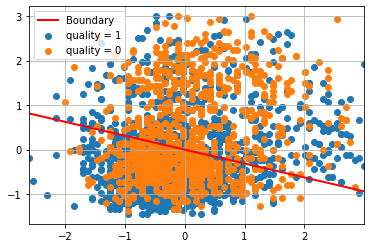

---------- eta = 0.0001 , iterations = 90 ----------
Beta: [-0.18628544 -0.62088994]
Confusion Matrix:
 [[295 104]
 [126  91]]
Error: 0.37337662337662336
Accuracy: 0.6266233766233766


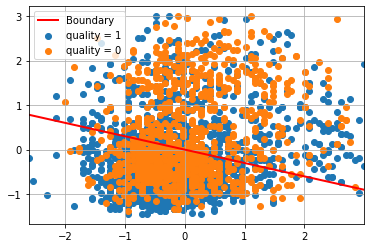

---------- eta = 0.0001 , iterations = 110 ----------
Beta: [-0.18431788 -0.62948382]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


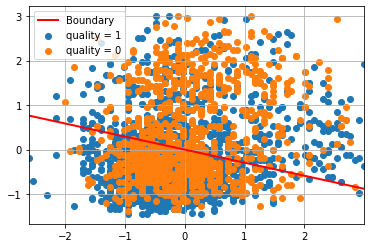

---------- eta = 0.001 , iterations = 10 ----------
Beta: [-0.18417639 -0.6325241 ]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


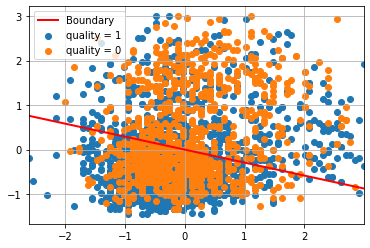

---------- eta = 0.001 , iterations = 30 ----------
Beta: [-0.18053039 -0.63765867]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


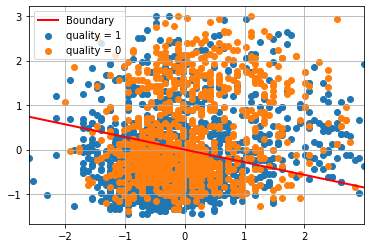

---------- eta = 0.001 , iterations = 50 ----------
Beta: [-0.18052767 -0.6376613 ]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


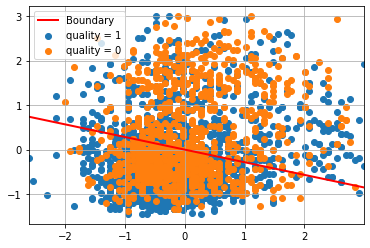

---------- eta = 0.001 , iterations = 70 ----------
Beta: [-0.18052766 -0.6376613 ]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


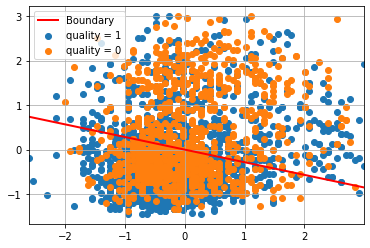

---------- eta = 0.001 , iterations = 90 ----------
Beta: [-0.18052766 -0.6376613 ]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


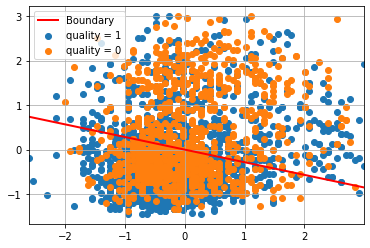

---------- eta = 0.001 , iterations = 110 ----------
Beta: [-0.18052766 -0.6376613 ]
Confusion Matrix:
 [[294 105]
 [126  91]]
Error: 0.375
Accuracy: 0.625


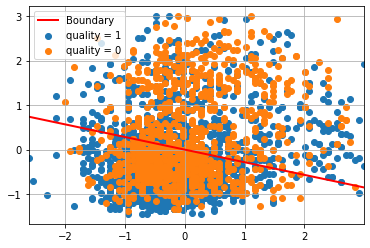

---------- eta = 0.01 , iterations = 10 ----------
Beta: [ 0.12259199 -1.80193414]
Confusion Matrix:
 [[296 103]
 [118  99]]
Error: 0.35876623376623373
Accuracy: 0.6412337662337663


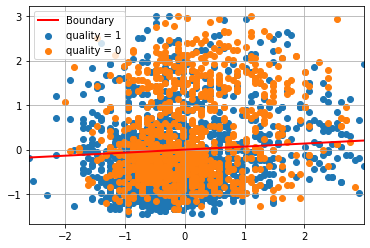

---------- eta = 0.01 , iterations = 30 ----------
Beta: [ 0.55037959 -1.18862964]
Confusion Matrix:
 [[271 128]
 [108 109]]
Error: 0.3831168831168831
Accuracy: 0.6168831168831169


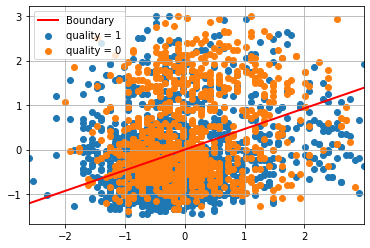

---------- eta = 0.01 , iterations = 50 ----------
Beta: [-1.44646724  0.25485888]
Confusion Matrix:
 [[243 156]
 [124  93]]
Error: 0.4545454545454546
Accuracy: 0.5454545454545454


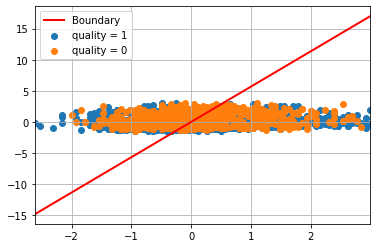

---------- eta = 0.01 , iterations = 70 ----------
Beta: [-2.7653379  -5.51571616]
Confusion Matrix:
 [[294 105]
 [122  95]]
Error: 0.36850649350649356
Accuracy: 0.6314935064935064


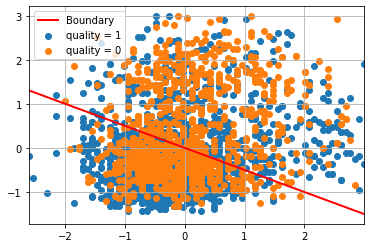

---------- eta = 0.01 , iterations = 90 ----------
Beta: [1.87225134 0.57673549]
Confusion Matrix:
 [[129 270]
 [101 116]]
Error: 0.6022727272727273
Accuracy: 0.3977272727272727


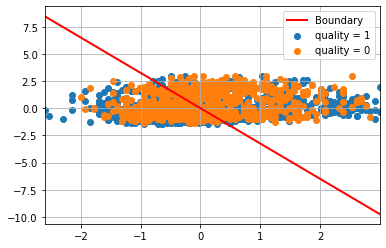

---------- eta = 0.01 , iterations = 110 ----------
Beta: [-0.46000709 -1.45315848]
Confusion Matrix:
 [[295 104]
 [125  92]]
Error: 0.3717532467532467
Accuracy: 0.6282467532467533


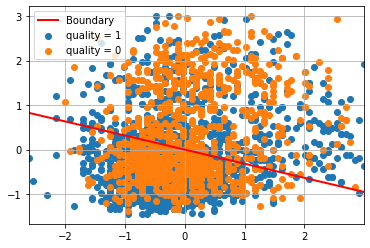

In [120]:
x_type2_outlier_removed = x_type2[((np.abs(stats.zscore(x_type2[:,0:2]))) < 3).all(axis=1)]
y_type2_outlier_removed = y_type2[((np.abs(stats.zscore(x_type2[:,0:2]))) < 3).all(axis=1)]

reporter(x_type2_outlier_removed, y_type2_outlier_removed)

-----
As it is clear in the scatter plots as well, we can see that there is not any obvious boundary between the data. As a result, in order to make sure that the logistic regression function is working correctly, i created a new simple dataset (with a line as its boundary) and used it as the input dataset to see if the function is working well or not.

In [82]:
x1_one = np.arange(0, 3, 0.01)
x2_one = x1_one + np.random.uniform(0.5, 1, len(x1_one))

x1_zero = np.arange(0.001, 3, 0.01)
x2_zero = x1_zero - np.random.uniform(0.5, 1, len(x1_zero))

y = np.append(np.ones(len(x1_one)), np.zeros(len(x1_zero)))

In [85]:
X = np.insert((np.array([np.append(x1_one, x1_zero)]).T), values = np.append(x2_one, x2_zero), obj = 1, axis = 1)
Xy = np.insert(X, 2, y, axis = 1)
np.random.shuffle(Xy)

Beta: [-4.2001007   4.31956932]
Confusion Matrix:
 [[65  0]
 [ 0 55]]
Error: 0.0
Accuracy: 1.0


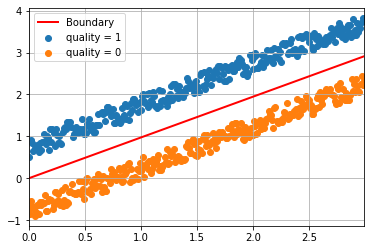

In [89]:
train_len = int(len(Xy) * 0.8)

## test and train datasets
x_train = Xy[0:train_len][:, 0:2]
y_train = Xy[0:train_len][:, 2]

x_test = Xy[train_len:][:, 0:2]
y_test = Xy[train_len:][:, 2]

beta = logistic_regression(x_train, y_train, max_iter = 200, only_iter = True, eta = 0.001)
conf_matrix, err, acc = error_calc(x_test, y_test, beta)
print('Beta:', beta)
print('Confusion Matrix:\n',conf_matrix)
print('Error:', err)
print('Accuracy:', acc)
            
data_plotter(X, y, beta)

As it can be seen, the function works perfectly and finds a boundary between the datasets which devides them to two groups.